In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
#EDA
df = pd.read_csv("FastagFraudDetection.csv")

In [3]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,01-06-2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,01-07-2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,01-08-2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,01-09-2023 02:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,01-10-2023 06:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [5]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [6]:
df.shape

(5000, 13)

In [7]:
# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [8]:
df.isnull()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
print("Missing values in 'FastagID':", df['FastagID'].isnull().sum())

Missing values in 'FastagID': 549


In [10]:
df = df.dropna(subset=['FastagID'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4451 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Transaction_ID         4451 non-null   int64         
 1   Timestamp              4451 non-null   datetime64[ns]
 2   Vehicle_Type           4451 non-null   object        
 3   FastagID               4451 non-null   object        
 4   TollBoothID            4451 non-null   object        
 5   Lane_Type              4451 non-null   object        
 6   Vehicle_Dimensions     4451 non-null   object        
 7   Transaction_Amount     4451 non-null   int64         
 8   Amount_paid            4451 non-null   int64         
 9   Geographical_Location  4451 non-null   object        
 10  Vehicle_Speed          4451 non-null   int64         
 11  Vehicle_Plate_Number   4451 non-null   object        
 12  Fraud_indicator        4451 non-null   object        
dtypes: 

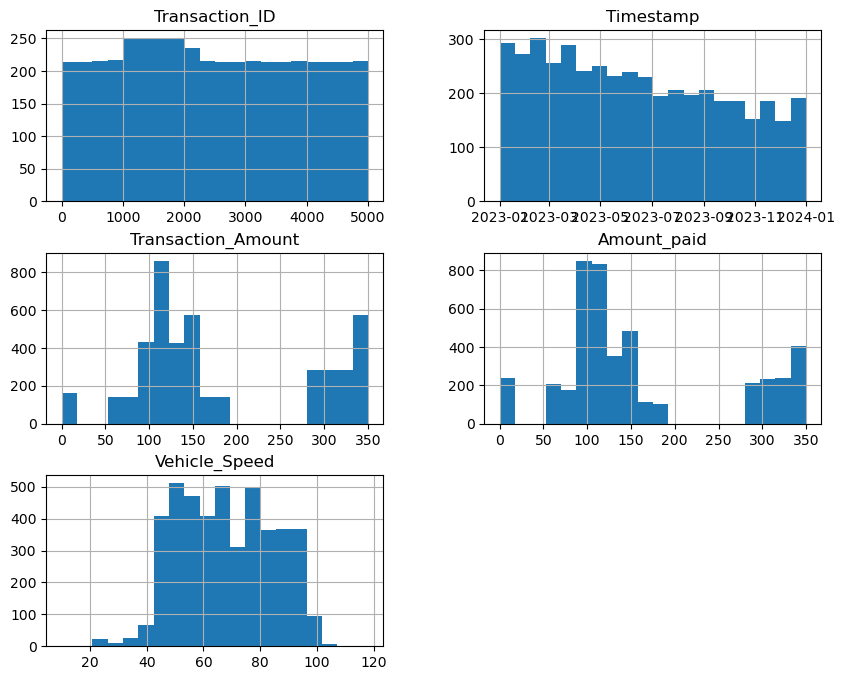

In [12]:
#Histogram
df.hist(figsize=(10, 8), bins=20)
plt.show()

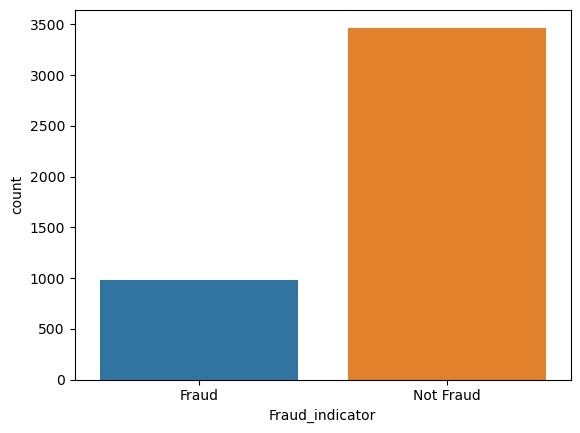

In [13]:
# Countplot for 'Fraud_indicator'
sns.countplot(x='Fraud_indicator', data=df)
plt.show()

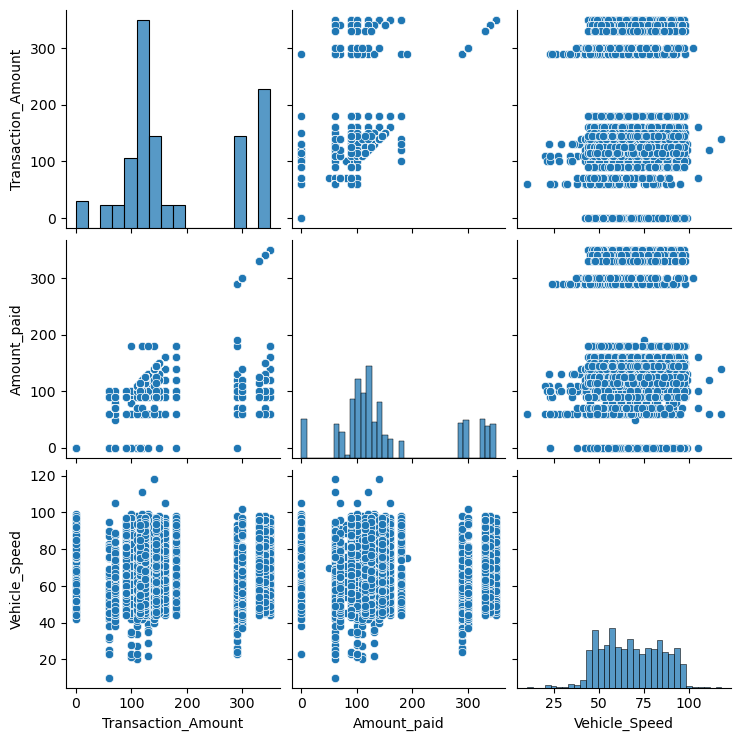

In [14]:
# Pairwise scatter plots for numerical variables
sns.pairplot(df, vars=['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed'])
plt.show()

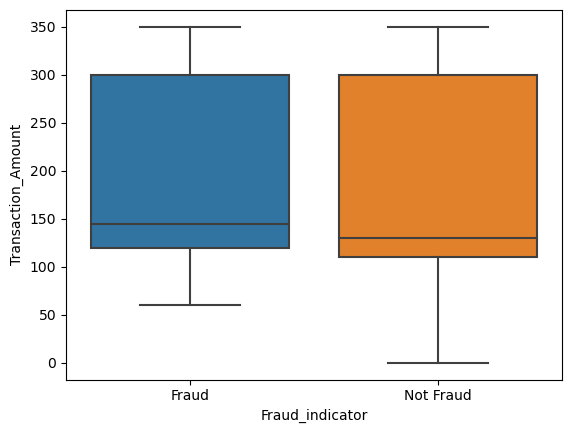

In [15]:
# Box plot for 'Transaction_Amount' and 'Amount_paid'
sns.boxplot(x='Fraud_indicator', y='Transaction_Amount', data=df)
plt.show()

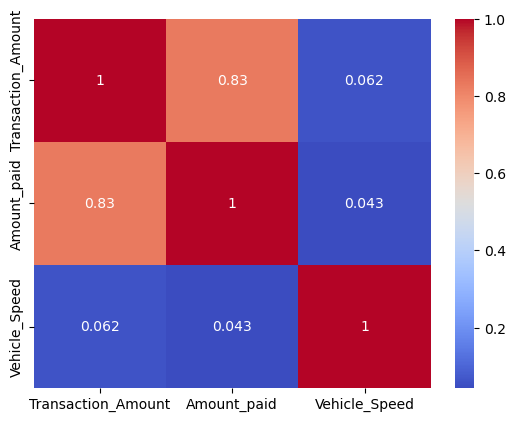

In [16]:
# Correlation matrix and heatmap for numerical variables
correlation_matrix = df[['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

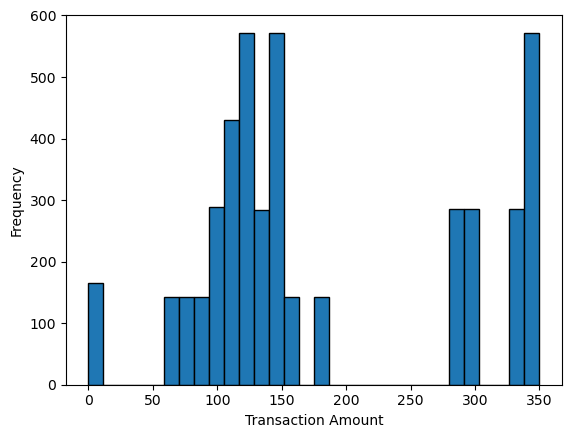

In [17]:
# Histogram of 'Transaction_Amount'
plt.hist(df['Transaction_Amount'], bins=30, edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

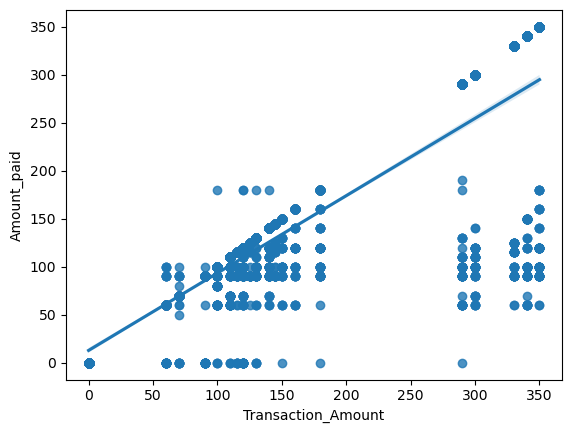

In [18]:
# Scatter plot with regression line between 'Transaction_Amount' and 'Amount_paid'
sns.regplot(x='Transaction_Amount', y='Amount_paid', data=df)
plt.show()

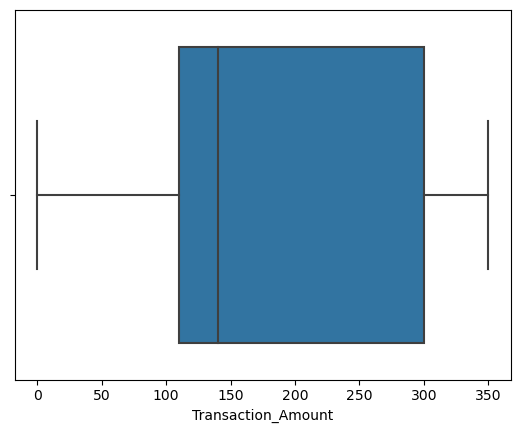

In [19]:
sns.boxplot(x='Transaction_Amount', data=df)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

In [23]:
#Select features Transaction_Amount, Amount_paid

selected_features = ['Transaction_Amount', 'Amount_paid']
X = df[selected_features]
y = df['Fraud_indicator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#Scaling and encoding output 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [30]:
#Neural network model
model = Sequential()
model.add(Dense(32, activation='relu',input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7023 - loss: 0.6229 - val_accuracy: 0.8511 - val_loss: 0.4164
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8590 - loss: 0.3540 - val_accuracy: 0.8933 - val_loss: 0.2468
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9099 - loss: 0.2210 - val_accuracy: 0.9508 - val_loss: 0.1737
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9511 - loss: 0.1599 - val_accuracy: 0.9607 - val_loss: 0.1373
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9623 - loss: 0.1182 - val_accuracy: 0.9803 - val_loss: 0.1159
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9721 - loss: 0.1089 - val_accuracy: 0.9817 - val_loss: 0.1019
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9824 - loss: 0.0830 - val_accuracy: 0.9817 - val_loss: 0.0956
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9815 - loss: 0.0759 - val_accuracy: 0.9817 - val_loss:

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [37]:
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to binary predictions
y_pred = np.round(y_pred_prob)

# Print accuracy metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)

# Print accuracy metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 98.43%
Precision: 0.98
Recall: 1.00
F1 Score: 0.99


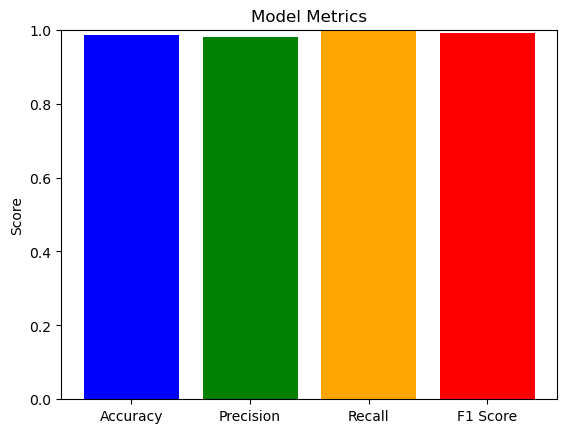

In [38]:
#Accuracy metrics
import matplotlib.pyplot as plt


metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Score')
plt.title('Model Metrics')
plt.ylim(0, 1)  
plt.show()